## Data Cleaning and Preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('insurance.csv')

print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [3]:
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

In [4]:
data = pd.get_dummies(data, columns=['region'], drop_first=True)

scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())

        age  sex       bmi  children  smoker      charges  region_northwest  \
0 -1.438764    0 -0.453320 -0.908614       1  16884.92400             False   
1 -1.509965    1  0.509621 -0.078767       0   1725.55230             False   
2 -0.797954    1  0.383307  1.580926       0   4449.46200             False   
3 -0.441948    1 -1.305531 -0.908614       0  21984.47061              True   
4 -0.513149    1 -0.292556 -0.908614       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


## Exploratory Data Analysis (EDA)

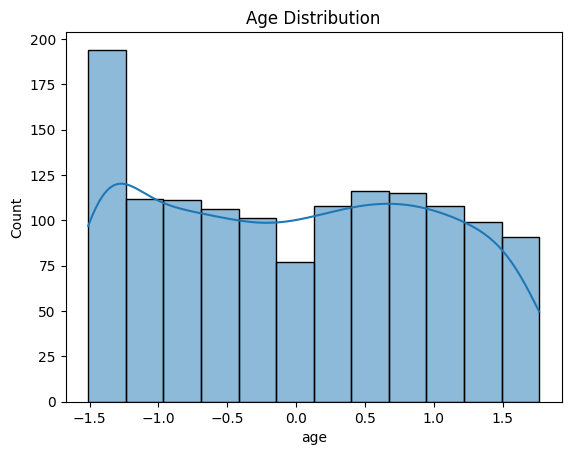

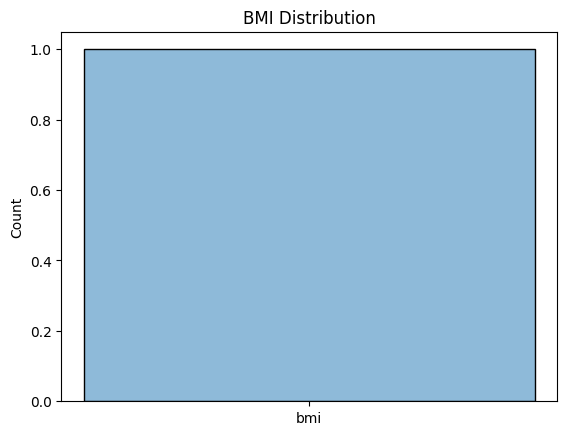

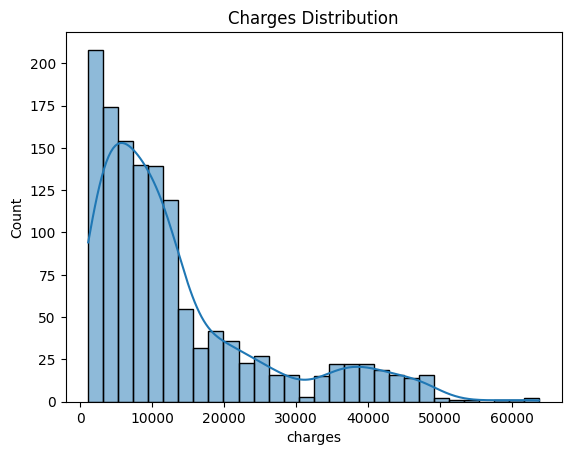

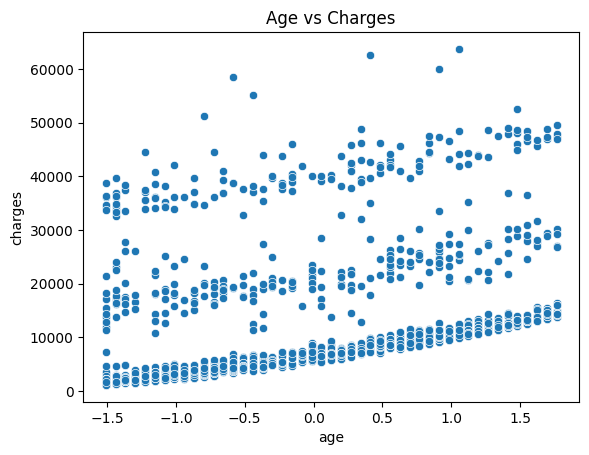

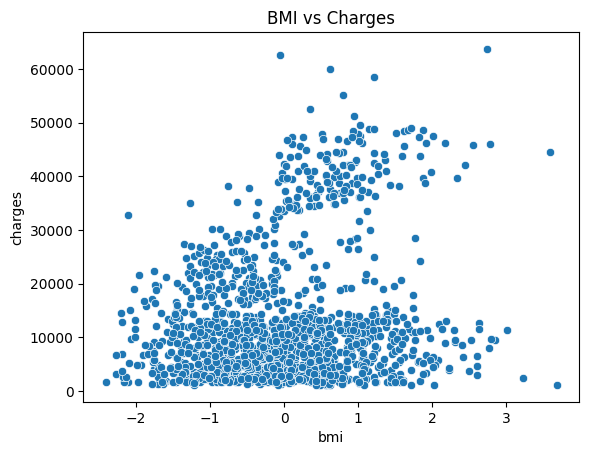

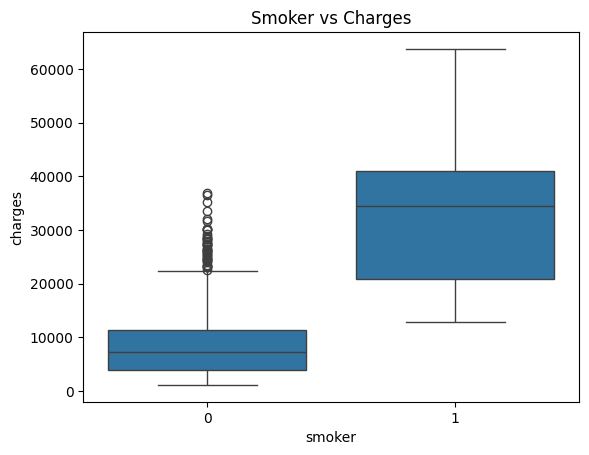

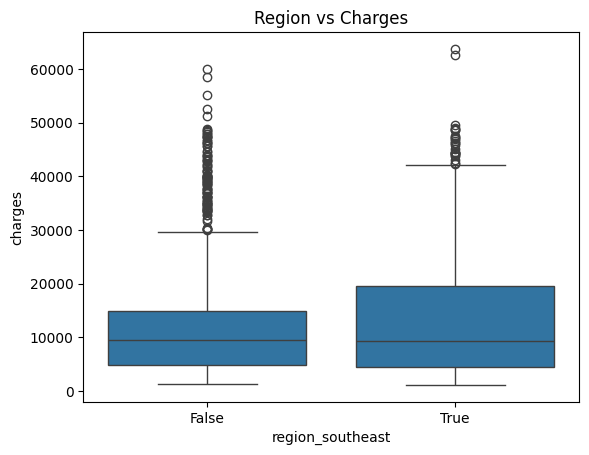

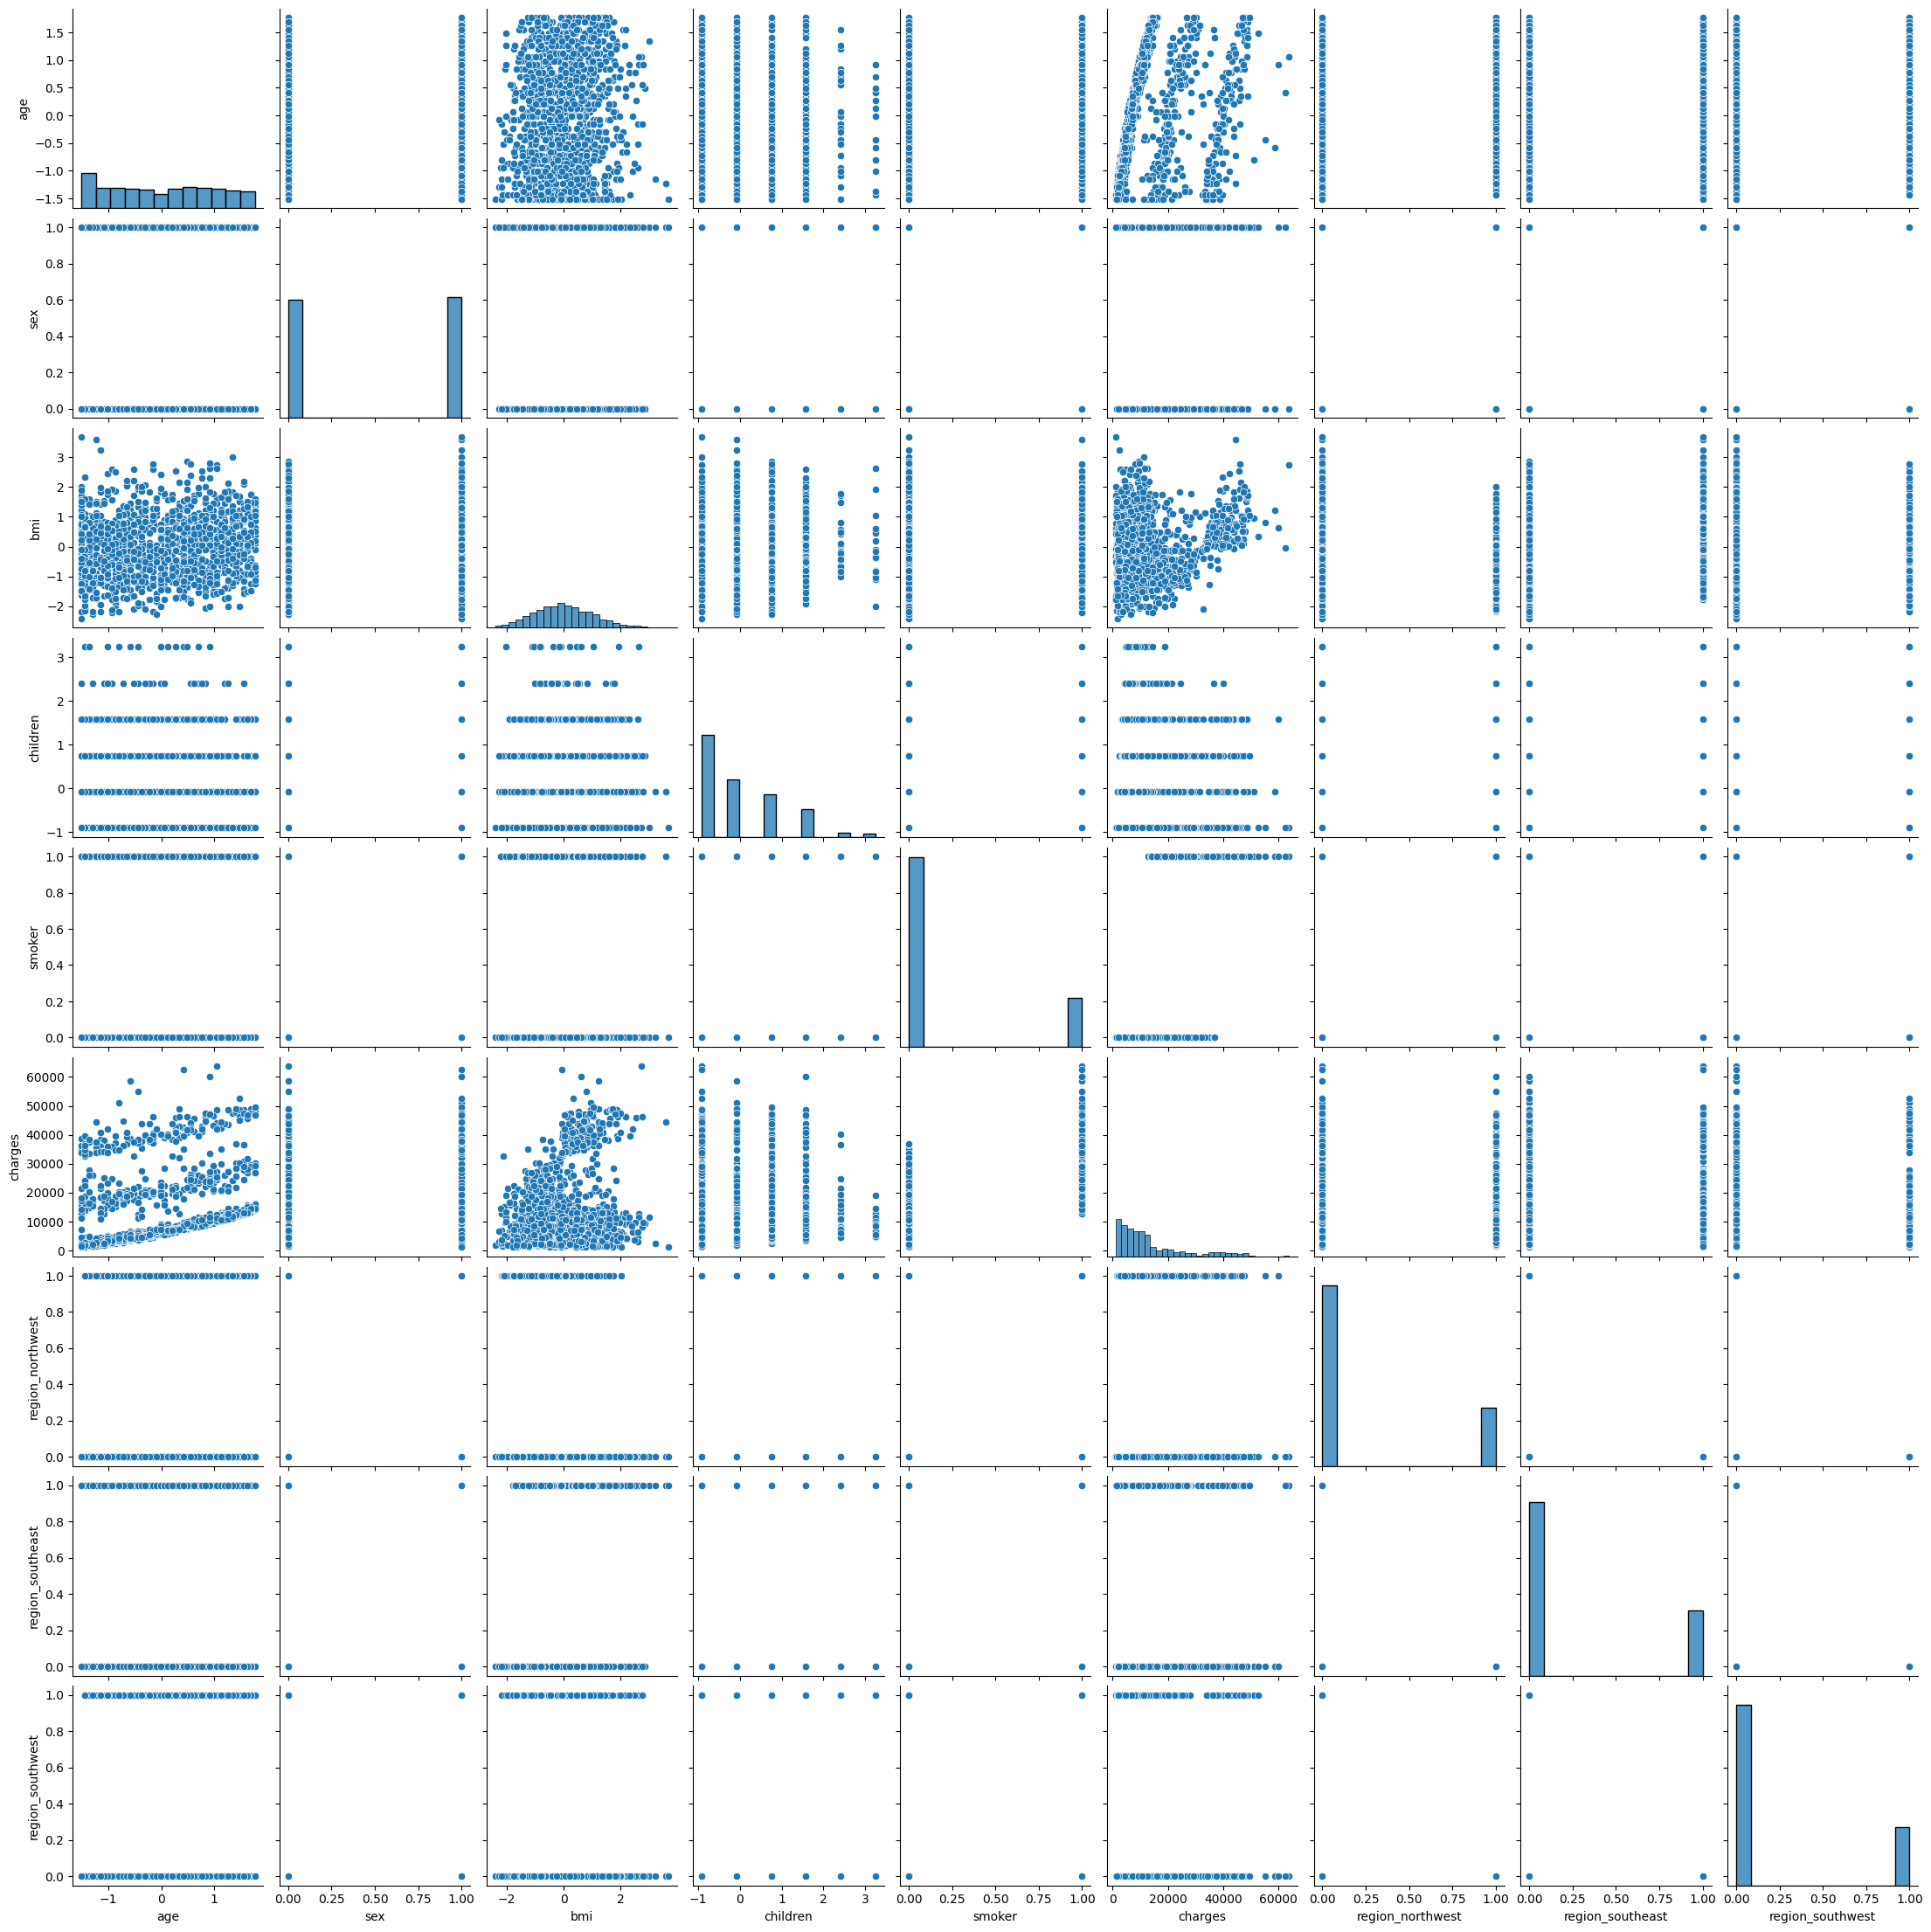

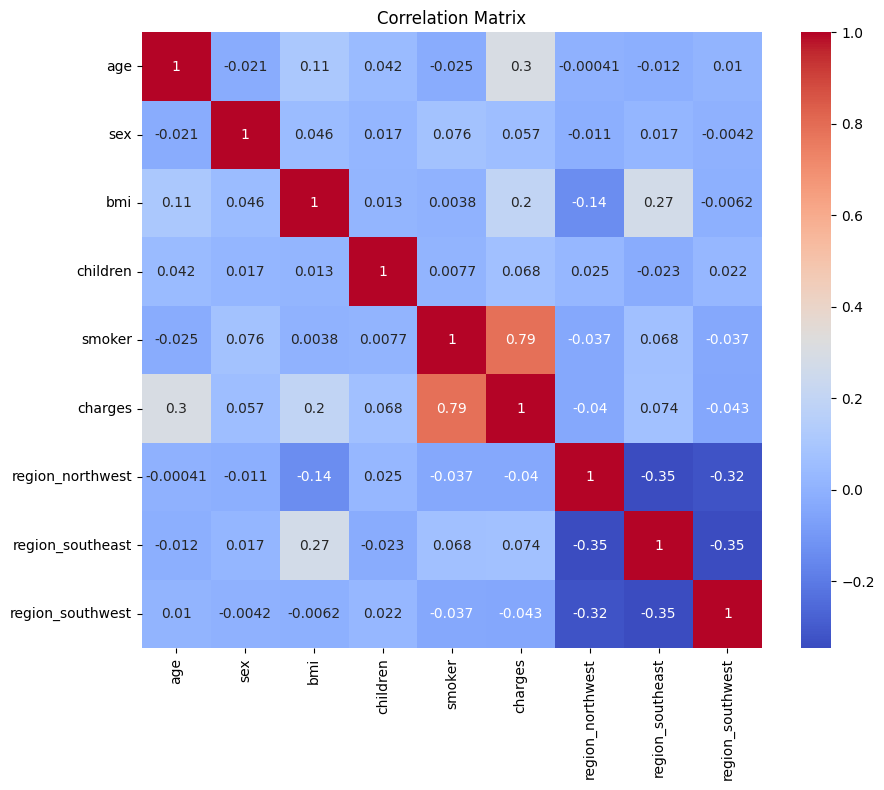

In [6]:
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

sns.histplot(data['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

sns.scatterplot(x='age', y='charges', data=data)
plt.title('Age vs Charges')
plt.show()

sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('BMI vs Charges')
plt.show()

sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Smoker vs Charges')
plt.show()

sns.boxplot(x='region_southeast', y='charges', data=data)
plt.title('Region vs Charges')
plt.show()

sns.pairplot(data)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Transformation

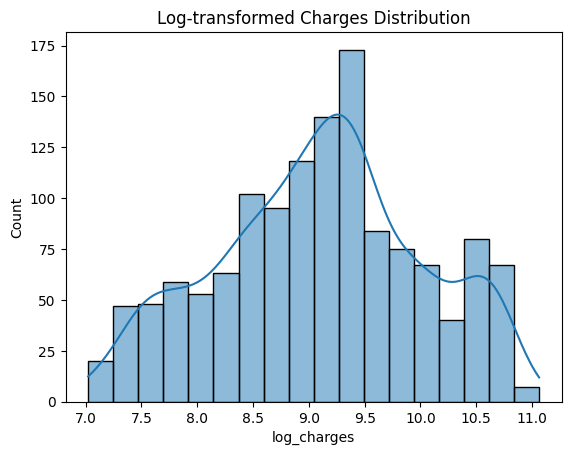

In [7]:
data['log_charges'] = np.log(data['charges'])

sns.histplot(data['log_charges'], kde=True)
plt.title('Log-transformed Charges Distribution')
plt.show()

## Model Training

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

X = data.drop(['charges', 'log_charges'], axis=1)
y = data['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f'{name}: {np.mean(np.sqrt(-scores))}')


Linear Regression: 0.45136296743718185
SVR: 0.3877342680967367
Random Forest: 0.40685499264209257
Decision Tree: 0.5332102760690507
Gradient Boosting: 0.3900945204099684


## Artificial Neural Network (ANN)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


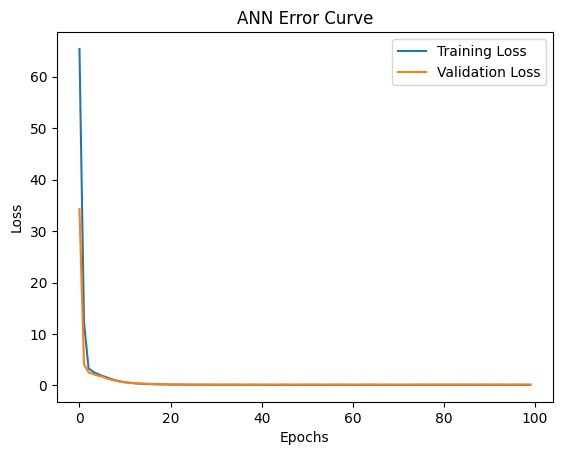

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

ann_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

ann_model.compile(optimizer='adam', loss='mse')

history = ann_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Error Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model with Convolutional Layers

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


float32


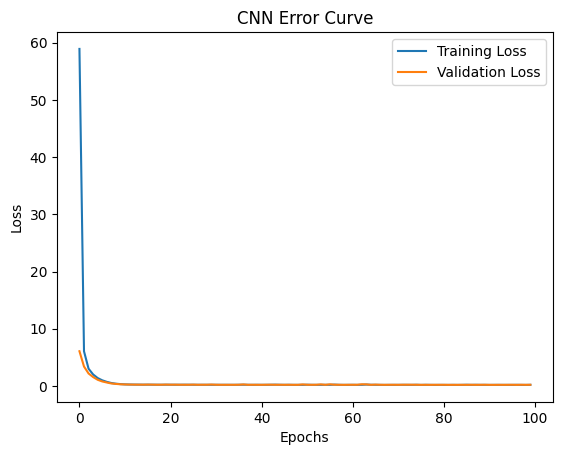

In [19]:
cnn_model = models.Sequential([
    layers.Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.Conv1D(32, 2, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse')

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

print(X_train_cnn.dtype)

history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=100, validation_split=0.2, verbose=0)

plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Error Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


##  Image Data Augmentation Techniques

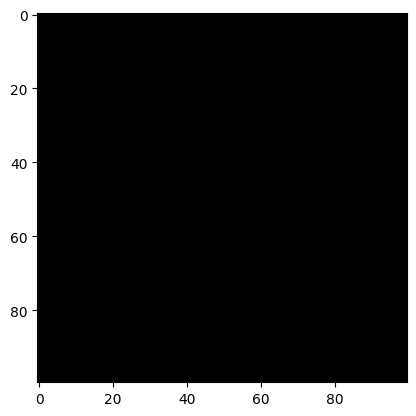

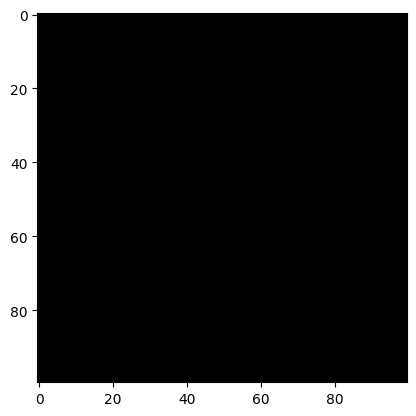

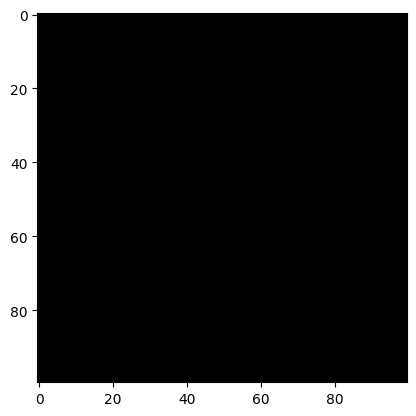

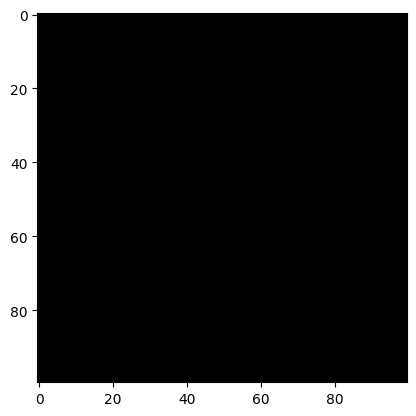

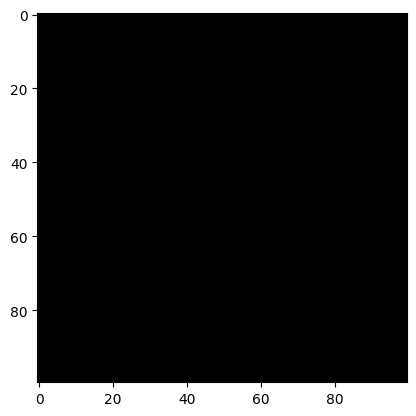

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


img = np.random.rand(100, 100, 3)
img = np.expand_dims(img, 0)


for _ in range(5):
    augmented_image = datagen.flow(img, batch_size=1)[0]
    augmented_image = np.squeeze(augmented_image, axis=0)
    plt.figure()
    plt.imshow(augmented_image.astype('uint8'))
    plt.show()
